# Week 4 - Distance metrics

In [1]:

# setup the presentation settings
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
          'theme': 'serif',
          'start_slideshow_at': 'selected',
          'transition': 'fade'
})

{'start_slideshow_at': 'selected', 'theme': 'serif', 'transition': 'fade'}

In [2]:
import numpy as np
from scipy.spatial.distance import euclidean
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Dimensionality reduction revisited.

- PCA has shown before is an incredibly powerful tool.
- But it does have major flaws

PCA was invented to handle points in Euclidean space
- So by default, it works with only Euclidean distances.
- But it can be generalized to any other distance metric.
- We commonly refer to this as [principal coordinates analysis](https://en.wikipedia.org/wiki/Multidimensional_scaling#Types)

The problem with Euclidean distance.
- It saturates
- Samples with no overlapping species are all equidistant.

In [12]:
band_size = 10
num_features = 30 

band = [1] * band_size + [0] * (num_features - band_size)
table = pd.DataFrame(
    np.vstack([np.roll(band, i) 
        for i in range(num_features - band_size)]))


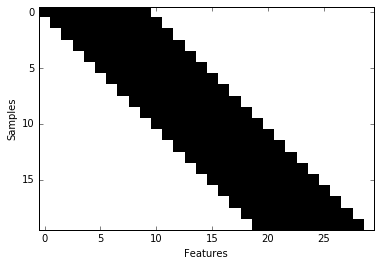

In [13]:
plt.imshow(table, aspect='auto', interpolation='nearest', cmap='Greys')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.grid(False)

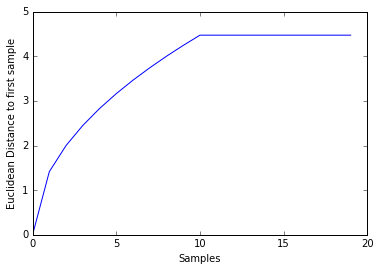

In [14]:
first_sample = table.iloc[0, :]
distances = table.apply(lambda x: euclidean(x, first_sample), axis=1)
plt.plot(distances)
plt.ylim([0, 5])
plt.ylabel('Euclidean Distance to first sample')
plt.xlabel('Samples')

This saturation property may have some uninitutive properties.

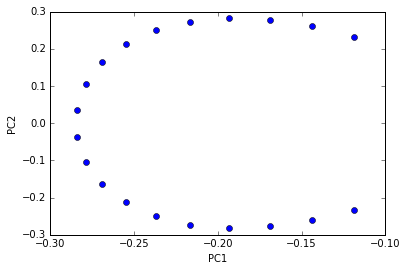

In [23]:
u, k, v = np.linalg.svd(table)
plt.plot(u[:, 0], u[:, 1], 'ob')
plt.xlabel('PC1')
plt.ylabel('PC2')

This property is present in many of the distance metrics we use.

While dubbed as artifacts, they reflect some of the more unintuitive nature of the underlying data.

And this is just one problem - not even accounting for the compositionality problem!